In [28]:
import pandas as pd
import seaborn as sns
import shap
import matplotlib.pyplot as plt
import os
df = pd.read_csv(r"C:\Users\HP\Desktop\888\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [29]:
print(os.getcwd())


C:\Users\HP


<Axes: xlabel='Department', ylabel='count'>

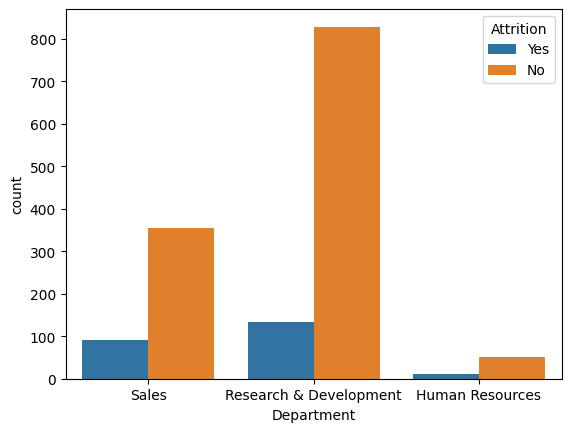

In [30]:
sns.countplot(x='Department', hue='Attrition', data=df)

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('Attrition', axis=1)
y = df['Attrition'].map({'Yes':1, 'No':0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
df_encoded = pd.get_dummies(df, drop_first=True)  # Avoids multicollinearity

In [33]:
X = df_encoded.drop('Attrition_Yes', axis=1)  # 'Attrition_Yes' is the encoded target
y = df_encoded['Attrition_Yes']


In [34]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[218  37]
 [ 31   8]]
              precision    recall  f1-score   support

       False       0.88      0.85      0.87       255
        True       0.18      0.21      0.19        39

    accuracy                           0.77       294
   macro avg       0.53      0.53      0.53       294
weighted avg       0.78      0.77      0.78       294



<Figure size 640x480 with 0 Axes>

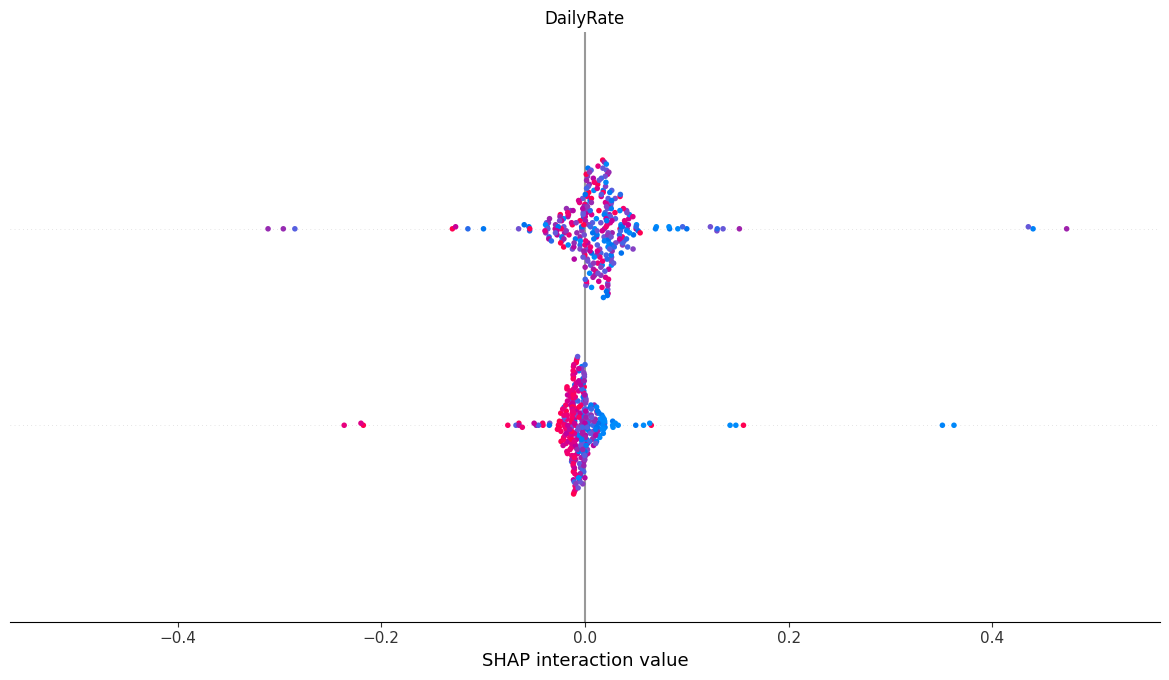

In [36]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [37]:
plt.figure()  # Ensure it's a new figure
shap.summary_plot(shap_values, X_test, show=False)  # Prevent auto-display
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches='tight')  # Save as PNG
plt.close()

<Figure size 640x480 with 0 Axes>

In [39]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.to_csv("hr_cleaned_data.csv", index=False)
